# Her er en test!

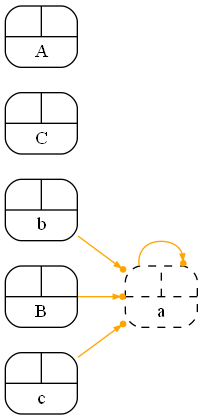

In [ ]:
import pm4py
from pm4py.objects.dcr.nested.obj import NestedDcrGraph
graph = NestedDcrGraph()

events = ["a", "b", "c", "A", "B", "C"]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

graph.marking.included.remove("a")

graph.nested["B"] = ["b", "c"]
graph.nested["b"] = ["a"]

graph.conditions["C"] = ["B"]

graph.update_nests()

pm4py.view_dcr(graph)